# Machine Learning

In [2]:
#Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
import sklearn.metrics as sm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle
from sklearn.model_selection import train_test_split

# for regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

# for classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# for nural network
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

### Table of Contents

* [Preparing the data](#prep)
* [Regression](#regression)
    * [Linear Regression](#lin_reg)
    * [Polynomial Regression](#pol_reg)
    * [KNN Regression](#knn_reg)
    * [Regression Conclusion](#reg_con)
* [Classification](#classification)
    * [KNN Classification](#knn_class)
    * [Bayes Classification](#bc_class)
* [Neural Network](#NN)
    * [Building the Enviroment](#BE)
    * [Building our Neural Network](#BNN)
    * [Training the model](#training_NN)


### Preparing the data <a class="anchor" id="prep"></a>

In [3]:
# Getting the data from a CSV file and splits the data for ervery ','
df_carList = pd.read_csv("datasets/carList.csv", delimiter=",")

In [4]:
# When we saved the carList the ID column was saved as well, so we remove this first
df_carList = df_carList.drop(['Unnamed: 0'], axis = 1)

In [5]:
df_carList.head(1)

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,EL PASO,TX,ACURA,ILX6-SPEED


We will also use clasifications such as naive base, Logistic Regression, KNN and random forrest clasifer. The reason why we have choosen so many is because to see which one is the best for the data. <br>

In the dataset df_carList we know that there are some expentive cars and we want to remove them to get at better Linear Regression, than we expect. So now the price is from 0 - 250000$

In [6]:
# Because of some outliers we drop prices over 250000 dollars
df_carList = df_carList.drop(df_carList[df_carList.Price > 250000].index)

In [7]:
# Now we are integer encoding to make it easier to work with
df_carList['City'] = pd.factorize(df_carList['City'])[0]
df_carList['State'] = pd.factorize(df_carList['State'])[0]
df_carList['Make'] = pd.factorize(df_carList['Make'])[0]
df_carList['Model'] = pd.factorize(df_carList['Model'])[0]

In [8]:
# Takes the column Make
x = df_carList.iloc[:,5:6]

In [9]:
# Takes the column Price
y = df_carList.iloc[:,0:1]

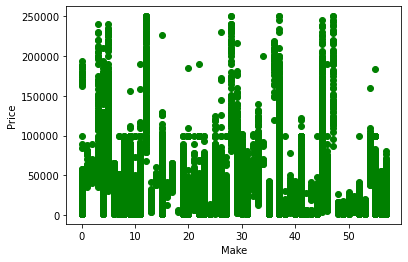

<Figure size 7200x288 with 0 Axes>

In [15]:
# Plot all
plt.xlabel('Make')
plt.ylabel('Price')
plt.scatter(x, y, color='green')
plt.show()

After we have created a dataplot we can see there are no mathematical context as linear or logarithmic regression.
<br>
Now we will try to see if any regression model fits:

### Regression <a class="anchor" id="regression"></a>

#### Linear Regression <a class="anchor" id="lin_reg"></a>
We will predict the Make by the other factors

In [10]:
# Takes all columns but Make
X = df_carList.iloc[:, [True, True, True, True, True, False, True]]
# Takes the column Make
y = df_carList.iloc[:,5:6]

In [11]:
# We takes 20 procent of the data for test set which is randomly selected
test_set_size = 0.2
seed = 7 # randomiztion

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)

In [12]:
# Create linear regressor object
regressor = LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
X_test.head(1)

,Price,Year,Mileage,City,State,Model
262222,16000,2014,35786,139,30,821


In [14]:
y_test.head(1)

,Make
262222,15


In [15]:
def intToWord(n):
    # Getting the data from a CSV file and splits the data for ervery ','
    df_carList_make_word = pd.read_csv("datasets/carList.csv", delimiter=",")
    df_carList_make_word = df_carList_make_word['Make'].unique()
    words = pd.DataFrame(df_carList_make_word, columns=['Make'])
    
    df_carList_make_int = df_carList['Make'].unique()
    integers = pd.DataFrame(df_carList_make_int, columns=['Make_int'])
    
    df_stack = pd.concat([words, integers], axis=1)
    df_stack.columns = ['Make', 'Make_int']
    
    val = df_stack.query('Make_int  == '+str(n))['Make']
    
    return val


intToWord(15)

15    FORD
Name: Make, dtype: object

In [16]:
# Predict the first line in X_test
X_first = [[16000, 2014, 35786, 139, 30, 821]]
y_predicted = regressor.predict(X_first)
y_predicted

array([[16.89388445]])

We expected the result 15, meaning Ford, but we got 16.89. So this model might not be perfect for our data.

In [17]:
# Now we do the same put with the intere X_test to use for the score
y_predicted = regressor.predict(X_test)
y_predicted

array([[16.89388445],
       [27.33028686],
       [16.37005697],
       ...,
       [36.59094883],
       [53.01989353],
       [23.44364031]])

In [18]:
regressor.score(X_test, y_test)

0.9682044152357181

The Linear Regression score is suprisingly good: 0,968. 

In [19]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predicted), 2))
print("Mean squared error (RMSE) =", round(sm.mean_squared_error(y_test, y_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predicted), 2))
print("R2 score =", round(sm.r2_score(y_test, y_predicted), 2))

Linear regressor performance:
Mean absolute error = 1.96
Mean squared error (RMSE) = 8.67
Median absolute error = 1.74
Explain variance score = 0.97
R2 score = 0.97


The results look good, but we will compare them with the other models later.

#### Polynomial Regression <a class="anchor" id="pol_reg"></a>

In [20]:
# polynomial regression model
polyreg = PolynomialFeatures(degree=4)

# transform our train data to adjust the polynom to linear regression model
X_pol = polyreg.fit_transform(X_train)

In [21]:
# create linear regression model
pollinreg = LinearRegression()
pollinreg.fit(X_pol, y_train)

LinearRegression()

In [22]:
# apply the model on our test data
X_pol_test = polyreg.fit_transform(X_test)
y_predicted = pollinreg.predict(X_pol_test)
y_predicted

array([[15.9000342 ],
       [24.91495889],
       [15.24148284],
       ...,
       [35.24491683],
       [54.699521  ],
       [21.33367263]])

In [23]:
# Compute performance metrics
print("Polynominal regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predicted), 2))
print("Mean squared error (RMSE) =", round(sm.mean_squared_error(y_test, y_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predicted), 2))
print("R2 score =", round(sm.r2_score(y_test, y_predicted), 2))
pol_r2 = round(sm.r2_score(y_test, y_predicted), 2)

Polynominal regressor performance:
Mean absolute error = 1.25
Mean squared error (RMSE) = 5.95
Median absolute error = 0.93
Explain variance score = 0.98
R2 score = 0.98


The results look better than Linear Regression, but we will compare these results with the other models later.

#### Non-Linear Regression by KNN <a class="anchor" id="knn_reg"></a>
Considering our data does not look linear, we will also try with Regression by KNN

In [24]:
# create an instance of the KNN regression modeel for our experiment
knn_model = KNeighborsRegressor(n_neighbors=5)

# fit the model to our train data
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [25]:
# Predict the first line in X_test
X_first = [[16000, 2014, 35786, 139, 30, 821]]
y_predicted = knn_model.predict(X_first)
y_predicted

array([[15.]])

We expected 15 and this is what it returned, so this might be a good model.

In [26]:
# Now we do the same put with the intere X_test to use for the score
y_predicted = knn_model.predict(X_test)

In [27]:
# Compute performance metrics
print("KNN regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_predicted), 2))
print("Mean squared error (RMSE) =", round(sm.mean_squared_error(y_test, y_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_predicted), 2))
print("R2 score =", round(sm.r2_score(y_test, y_predicted), 2))
knn_r2 = round(sm.r2_score(y_test, y_predicted), 2)

KNN regressor performance:
Mean absolute error = 2.13
Mean squared error (RMSE) = 12.43
Median absolute error = 1.4
Explain variance score = 0.95
R2 score = 0.95


These results are not as good as the other models.

#### Regression conclusion <a class="anchor" id="reg_con"></a>

<b>R2:</b> 
<br>The Linear Regression shows us that 97% of the variability observed in the target variable is explained by the regression model. The KNN Regression shows us that only 95 % is explained by this model, and the Polynomial shows 98 %. Therfore, based on the R2 percentage, the Polynomial regression fits our data best. 

<b>Mean absolute error:</b> 
<br>
The mean of absolute error in the Linear Regression model is 1.96, for the Polynomial it is 1.25 and for the KNN Regression it is 2.13. Again the Polynomial has the best fit.
<br>

<b>Mean squared error (RMSE):</b> 
<br>
The mean of squared error in the Linear Regression model is 8.67, for the Polynomial it is 5.95 and for the KNN Regression it is 12.43. Again the Polynomial has the best fit.

<br>

##### Conclusion:
The best regression model for our data is the Polynomial.
<br><br>
We will save the Polynomial model, because it is the best of the regression models.

In [28]:
filename = 'Polynomial_Regression_Model.sav'
pickle.dump(pollinreg, open(filename, 'wb'))

In [29]:
# Testing if the model is saved correctly
loaded_model = pickle.load(open(filename, 'rb'))
y_predicted = loaded_model.predict(X_pol_test)
y_predicted

array([[15.9000342 ],
       [24.91495889],
       [15.24148284],
       ...,
       [35.24491683],
       [54.699521  ],
       [21.33367263]])

In [30]:
pollinreg.predict(X_pol_test)
# The model matches 

array([[15.9000342 ],
       [24.91495889],
       [15.24148284],
       ...,
       [35.24491683],
       [54.699521  ],
       [21.33367263]])

### Classification <a class="anchor" id="classification"></a>

#### KNeighbors Classifier <a class="anchor" id="knn_class"></a>

In [31]:
# Standardize features by removing the mean and scaling to unit variance.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We will find the best number of neighbors:

In [32]:
#accuracy = []
# Will take some time
#for i in range(1,40):
#    print(i)
#    knn = KNeighborsClassifier(n_neighbors=i)
#    knn.fit(X_train,y_train)
#    pred_i = knn.predict(X_test)
#    accuracy.append(metrics.accuracy_score(y_test, pred_i))
#    print('done')

In [33]:
# This is the result from the loop above, but because of how long it took
# we instantiate it manually:
accuracy = [0.7930641876624939,
 0.7608030940601322,
 0.7810682489098603,
 0.7820366099148429,
 0.7874594315427458,
 0.7829873643560986,
 0.7846893321830378,
 0.7822361509704151,
 0.7812443145471298,
 0.779248903991408,
 0.7776701821105575,
 0.7759153945924374,
 0.7740608365465312,
 0.7727168688487068,
 0.7722590981918059,
 0.7701110974171171,
 0.7687319165918388,
 0.766331555070397,
 0.765433620320322,
 0.763913586985228,
 0.762833717743308,
 0.7611376187709444,
 0.7598347330551496,
 0.7577747650990956,
 0.7567829286758103,
 0.7556326331789824,
 0.7543649605906415,
 0.7525690910904919,
 0.7519117793780188,
 0.7508495166998257,
 0.7495407621294552,
 0.7482144009953577,
 0.7471580071717403,
 0.7458609903105211,
 0.7449102358692654,
 0.7437247272449836,
 0.7428561367677871,
 0.7415943330340218,
 0.7407668245388548]

Text(0, 0.5, 'Accurancy Score')

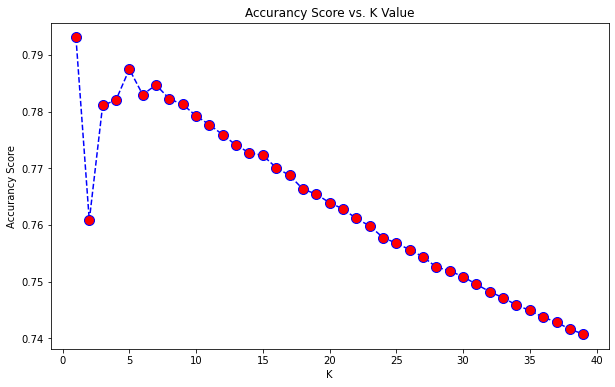

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Accurancy Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Accurancy Score')

We can see that the k with the highest accuracy score is 1.

In [35]:
# We instancere the KNC to fit the model 
KN_model= KNeighborsClassifier(n_neighbors=1)
y_train = np.ravel(y_train)
KN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
KN_model.score(X_test, y_test)

0.7930641876624939

The accuracy score is not perfect, so another classifier might be better for this data.

In [37]:
X_first = [[-0.41980089,  0.20764132, -0.39776847, -0.85553888,  1.16497857, -0.54277113]]
prediction = KN_model.predict(X_first)
prediction

array([15], dtype=int64)

X_first is again the first point in X_test. The first point in y_test is 15 which is what we get from this classifier. 

In [38]:
prediction = KN_model.predict(X_test)

In [39]:
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)

[[ 1550     1     0 ...     0     0     0]
 [    0     1     0 ...     0     0     0]
 [    0     0     2 ...     0     0     0]
 ...
 [    0     0     0 ... 14528   181    13]
 [    0     0     0 ...   484  4037   116]
 [    0     0     0 ...    90   242   677]]


In the confusion matrix we can see that there are some false positives and false negative. <br> The number of thoes is not that high and that is reflected in the model score.

In [40]:
print(classification_report(y_test, prediction))

C:\Users\miade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2194
           1       0.20      0.08      0.11        13
           2       0.67      1.00      0.80         2
           3       0.48      0.41      0.44        34
           4       0.60      0.57      0.59      2546
           5       0.77      0.61      0.68        90
           6       0.84      0.86      0.85      6540
           7       0.59      0.52      0.56      2449
           8       0.59      0.57      0.58      2963
           9       0.90      0.93      0.91     20151
          10       0.53      0.51      0.52      3250
          11       0.64      0.60      0.62      6846
          12       0.90      0.96      0.93        55
          13       0.31      0.28      0.30       348
          14       0.00      0.00      0.00         1
          15       0.85      0.88      0.87     22073
          16       0.00      0.00      0.00         2
          17       0.44    

C:\Users\miade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The KNN Classifier works best on large noicy data and because we have data that are more compact and simmalar the result is not the best <br>
The precision, recall and f1-score is all around 0.55, and we wanted something very close to 1, so another classifier might be better.

#### Bayes Classification <a class="anchor" id="bc_class"></a>

In [41]:
# Now we are integer encoding to make it easier to work with
df_carList['City'] = pd.factorize(df_carList['City'])[0]
df_carList['State'] = pd.factorize(df_carList['State'])[0]
df_carList['Make'] = pd.factorize(df_carList['Make'])[0]
df_carList['Model'] = pd.factorize(df_carList['Model'])[0]

In [42]:
# X being all columns beside Make
# Y being Make
X = df_carList.loc[:, df_carList.columns != 'Make'].values
print(X)
y = df_carList.iloc[:,5:6].values
print(y)

[[ 8995  2014 35725     0     0     0]
 [10888  2013 19606     1     1     1]
 [ 8995  2013 48851     0     0     0]
 ...
 [55999  2016 28941  1019     2  2597]
 [60240  2017  3005   758     8  2683]
 [76995  2017  2502   930     1  2684]]
[[ 0]
 [ 0]
 [ 0]
 ...
 [57]
 [57]
 [57]]


In [43]:
# We takes 20 procent of the data for test set which is randomly selected
test_set_size = 0.2
# Initial value for randomization
seed = 7
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)

In [44]:
# We instatiage the modeland fits it to the train data
model = GaussianNB()
y_train = np.ravel(y_train)
model.fit(X_train, y_train)

GaussianNB()

In [45]:
model.score(X_test, y_test)

0.9162925271874688

The accuracy score is much better the for the KNN classifier.

In [46]:
X_test[0]

array([16000,  2014, 35786,   139,    30,   821], dtype=int64)

In [47]:
# you can also pre predict some informaion and run it to see if the array is matching
#This prediction is based on the first point in the dataframe and we expect it to return Acura
prediction = model.predict([X_test[0]])
prediction

array([15], dtype=int64)

In [48]:
y_test[0]

array([15], dtype=int64)

This is exactly the value we expected.

In [49]:
prediction = model.predict(X_test)
prediction

array([15, 26, 15, ..., 37, 55, 22], dtype=int64)

In [50]:
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)

[[ 2034     1     0 ...     0     0     0]
 [    0    10     0 ...     0     0     0]
 [    0     0     2 ...     0     0     0]
 ...
 [    0     0     0 ... 15122     0     0]
 [    0     0     0 ...   150  4284    47]
 [    0     0     0 ...     0   249   716]]


In the confusion matrix we can see that there are some false positives and false negative. <br> The number of thoes is not that high and it reflexs in the model score

In [51]:
print(classification_report(y_test, prediction))

C:\Users\miade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2194
           1       0.91      0.77      0.83        13
           2       1.00      1.00      1.00         2
           3       0.88      0.88      0.88        34
           4       0.94      0.96      0.95      2546
           5       0.74      0.78      0.76        90
           6       1.00      0.99      0.99      6540
           7       0.98      0.90      0.93      2449
           8       0.92      0.84      0.88      2963
           9       0.97      0.99      0.98     20151
          10       0.99      0.95      0.97      3250
          11       0.72      0.93      0.81      6846
          12       0.87      1.00      0.93        55
          13       1.00      0.86      0.92       348
          14       1.00      1.00      1.00         1
          15       1.00      0.97      0.98     22073
          16       0.04      0.50      0.07         2
          17       0.81    

C:\Users\miade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The overall score is good, approximately 0.92, but Makes like Mercury and Pontiac brings the score down a bit, which perhaps can be some of the false positives and false negatives in the confusion matrix
<br><br>
The score is still better than the KNN scores, so we will save this model to future use.

In [52]:
# Using pickle to save the model in GaussianNB_model.sav
filename = 'GaussianNB_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [53]:
# To see if we saved the file correctly
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.9162925271874688

### Neural Network <a class="anchor" id="NN"></a>

#### Building Enviroment <a class="anchor" id="BE"></a>

In [54]:
# X being all columns beside Make
# Y being Make
X = df_carList.loc[:, df_carList.columns != 'Make'].values
print(X)
y = df_carList.iloc[:,5:6].values
print(y)

[[ 8995  2014 35725     0     0     0]
 [10888  2013 19606     1     1     1]
 [ 8995  2013 48851     0     0     0]
 ...
 [55999  2016 28941  1019     2  2597]
 [60240  2017  3005   758     8  2683]
 [76995  2017  2502   930     1  2684]]
[[ 0]
 [ 0]
 [ 0]
 ...
 [57]
 [57]
 [57]]


In [55]:
# The labels are the car Makes
labels = df_carList['Make']

In [56]:
# The Features are the other columns in the dataframe
features = df_carList.loc[:, df_carList.columns != 'Make'].values

In [57]:
# Setting X to the features because we use X later
X=features

In [58]:
#Normalizing the data with standard scaler
sc = StandardScaler()
X = sc.fit_transform(X)
#X

In [59]:
# We use OneHotEncoding on y, and the new array shape will be (n, number of classes), 
# where n is the number of samples in our dataset.
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [60]:
# There are 851954 number of samples and 58 classes, which is used later
y.shape

(851954, 58)

In [61]:
# Splitting the dataset with a random state at 42. Test data will be 20 % of total data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

#### Building our Neural Network <a class="anchor" id="BNN"></a>
We instantiate our model by Keras' Sequential(), which means we sequentially creates the model where we add the output of each layer as input to the next layer.
<br><br>
Our input is of 6 values, and our output is of 58 values. 
<br><br>
In our neural network, we are using six hidden layers of 500, 250, 100, 50 and 250 dimension. The layers have the activation function called relu, which works by returning 0 in the result is negative and 1 if the result is positive. 
<br><br>
We also have a layer with the dimension 175 containing a kernel_regularizer which is used to apply the penalty L1 (Least Absolute Deviations) on the layer's kernel. We chose L1 because we know our dataset contains a lot of outliers. 
<br><br>
The output layer contains the activation function softmax, which calculates the probabilities distribution of an event over a number of different events. We use this becuase the results can be multiple classes; we have 58 different classes.
<br><br>
The last thing we add is a Dropout layer which help combat overfitting 

In [62]:
# Neural network

inputVal = 6
outputVal = 58

model = Sequential()
model.add(Dense(250, input_dim=inputVal, activation='relu'))
model.add(Dense(175, activation='relu'))
model.add(Dense(50, input_dim=inputVal, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(175, input_dim=inputVal, activation='relu'))
model.add(Dense(90, kernel_regularizer='l1'))
model.add(Dense(outputVal, activation='softmax'))
model.add(Dropout(.2, input_shape=(2,)))

In [63]:
# Now we compile the model, we chose the L1 as loss, and the adam (Adaptive Moment Estimation) optimizer.
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

#### Training the model <a class="anchor" id="training_NN"></a>

In [64]:
# We are fitting the model with 3 epochs and a batch size of 64
history = model.fit(X_train, y_train, epochs=3, batch_size=64)

Epoch 1/3
10650/10650 [==============================] - 49s 4ms/step - loss: 0.0969 - accuracy: 0.3828
Epoch 2/3
10650/10650 [==============================] - 47s 4ms/step - loss: 0.0397 - accuracy: 0.4102
Epoch 3/3
10650/10650 [==============================] - 48s 4ms/step - loss: 0.0400 - accuracy: 0.4094


In [65]:
# We can predict on X_test using model.predict(). 
# It takes the test data as input and returns the prediction outputs as softmax.

y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

5325/5325 [==============================] - 12s 2ms/step


In [66]:
# Now we calculate the accuracy score for the predicted and for the test data:
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 29.311407292638698


The score canges every time we run this and it is not a good score neither way. But when we last ran this the score was this: 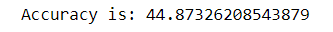

We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs. We can do this by changing fit function as:

In [67]:
# Now we change the fit function so that we can see if there is any overfitting at the time of training only. 
# We do this by validating with the test data.
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=3, batch_size=64)

Epoch 1/3
10650/10650 [==============================] - 54s 5ms/step - loss: 0.0417 - accuracy: 0.3904 - val_loss: 0.0361 - val_accuracy: 0.4905
Epoch 2/3
10650/10650 [==============================] - 54s 5ms/step - loss: 0.0472 - accuracy: 0.2363 - val_loss: 0.0611 - val_accuracy: 0.1714
Epoch 3/3
10650/10650 [==============================] - 57s 5ms/step - loss: 0.0491 - accuracy: 0.2180 - val_loss: 0.0454 - val_accuracy: 0.3214


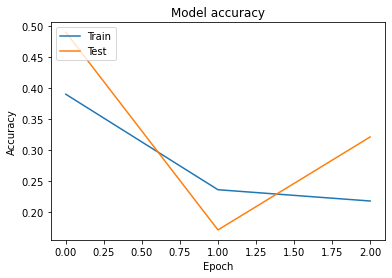

In [68]:
# This shows the accuracies for the test and training data for each epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

From the Model accuracy graph we can see that the accuracy drops in the middel at 1 for the test data. The graph changes every time we run this, but at the time we describe it her, the graph looks like this: 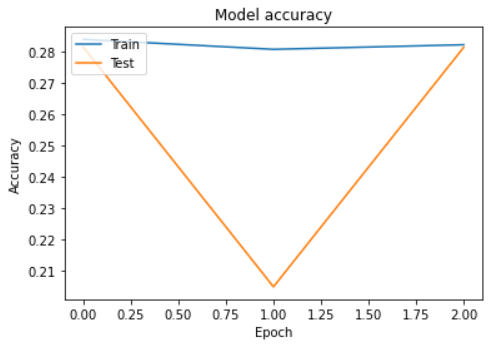

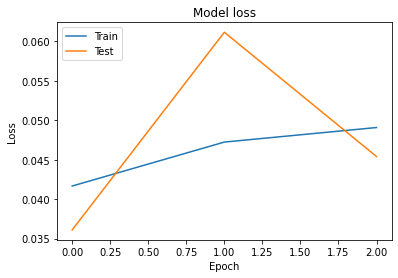

In [69]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

From the Model loss graph we can see that the test data peeks at 1:
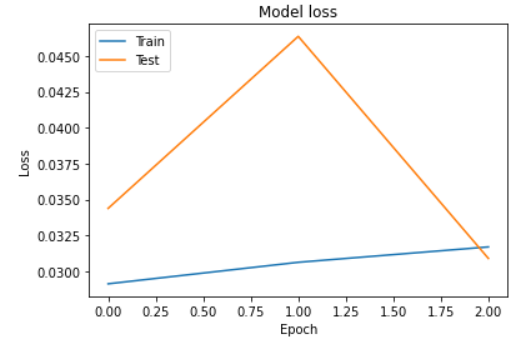

Based on the results, our data might not be perfect for a neural network.